<a href="https://colab.research.google.com/github/kalopez0621/Portfolio/blob/main/MachineLearningforDigitRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part 1: Data**

In [ ]:
import os
import tarfile
import pandas as pd
import gzip
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
gz_file_path = '/content/zip.train.gz'
extracted_file_path = '/content/zip.train'

with gzip.open(gz_file_path, 'rb') as f_in:
  with open(extracted_file_path, 'wb') as f_out:
    f_out.write(f_in.read())

print('Extraction completed.')

train_data = pd.read_csv(extracted_file_path, sep='\s+', header=None)
train_data.head()

from matplotlib import pyplot as plt
_df_28['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_29[0].plot(kind='line', figsize=(8, 4), title=0)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_30[4].plot(kind='line', figsize=(8, 4), title=4)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_31[5].plot(kind='line', figsize=(8, 4), title=5)
plt.gca().spines[['top', 'right']].set_visible(False)

Extraction completed.


,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,6.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,...,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0
1,5.0,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
2,4.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0
3,7.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,...,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
4,3.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0


Part 1: Data Descriptions:
  
Overview:
*   Source: zip.train
*   Objective: The dataset is used for classification of handwritten digits and each is represented as a 16x16 image.
*   Features: It has 256 feature columns, each is represented by grayscale pixel value. Pixels are normalized and range from -1 to 1
*   Target Variable: first column is the actual digit (0 through 9) that the imge represents.
*   Samples: contains 7291 samples






Inital Observation:

In [ ]:
train_data.shape

(7291, 257)

# **Part 2: EDA**

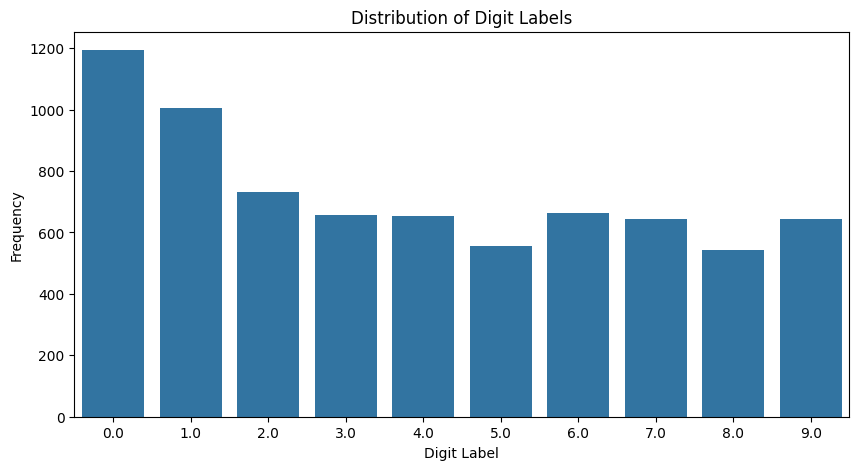

In [ ]:
#distribution of labels
label_counts = train_data[0].value_counts().sort_index()
plt.figure(figsize=(10, 5))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Distribution of Digit Labels')
plt.xlabel('Digit Label')
plt.ylabel('Frequency')
plt.show()

#summary statistics
pixel_stats = train_data.describe().drop(columns=[0])

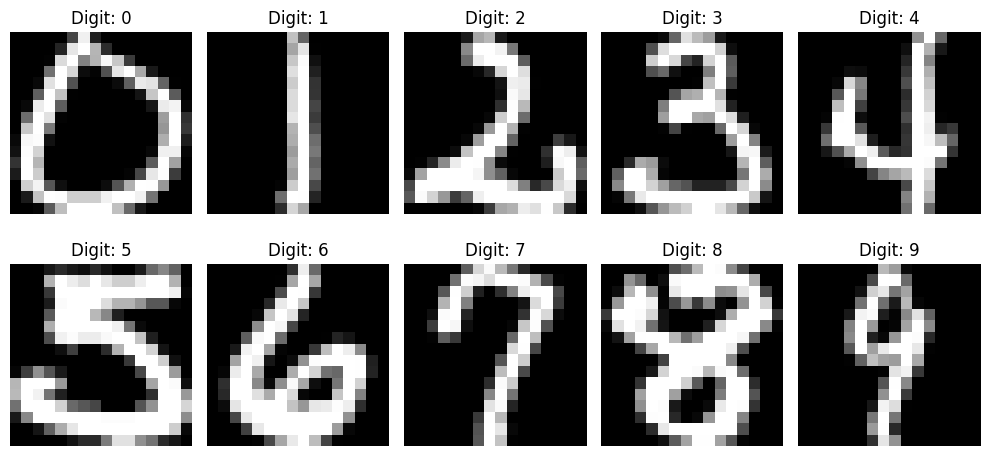

In [ ]:
#visualize digits
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flatten()):
  #reshape the row to 16x16 and plot
  digit_image = train_data.loc[train_data[0] == i].drop(columns=[0]).iloc[0].values.reshape(16, 16)
  ax.imshow(digit_image, cmap='gray')
  ax.set_title(f'Digit: {i}')
  ax.axis('off')
plt.tight_layout()
plt.show()

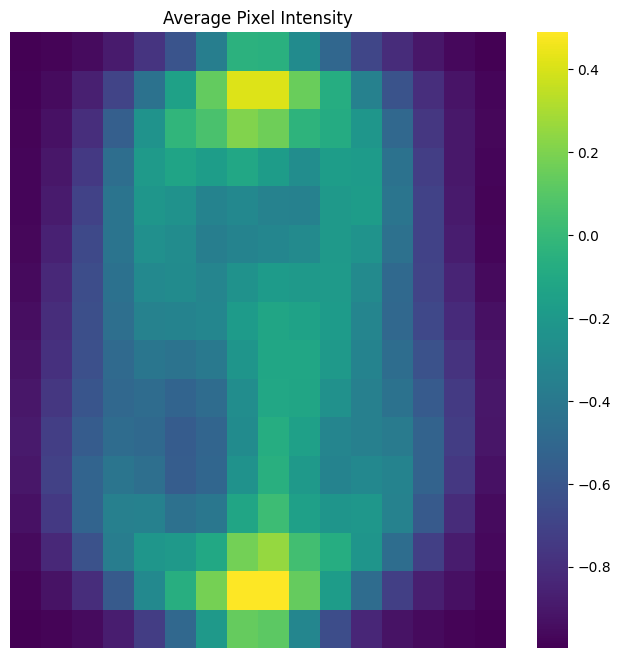

In [ ]:
#compute mean of each pixel column
mean_pixels = train_data.drop(columns=[0]).mean().values.reshape(16, 16)
plt.figure(figsize=(8, 8))
sns.heatmap(mean_pixels, cmap='viridis')
plt.title('Average Pixel Intensity')
plt.axis('off')
plt.show()

# **Part 3: Modeling**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score


In [ ]:
#Features
X = train_data.drop(columns=[0]).values
# Labels
y = train_data[0].values.astype(int)

#split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## K-Nearest Neighbors

In [ ]:
#Training K-Nearest Neighbors (KNN)
# use cross-validation to find the best k
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
print('KNN Accuracy:', accuracy_score(y_test, knn_predictions))
print(classification_report(y_test, knn_predictions))

KNN Accuracy: 0.9664153529814942
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       247
           1       0.99      1.00      0.99       214
           2       0.98      0.95      0.96       131
           3       0.93      0.95      0.94       115
           4       0.98      0.97      0.98       126
           5       0.96      0.92      0.94       114
           6       0.99      0.98      0.98       123
           7       0.97      0.95      0.96       151
           8       0.99      0.94      0.97       108
           9       0.93      0.97      0.95       130

    accuracy                           0.97      1459
   macro avg       0.97      0.96      0.96      1459
weighted avg       0.97      0.97      0.97      1459



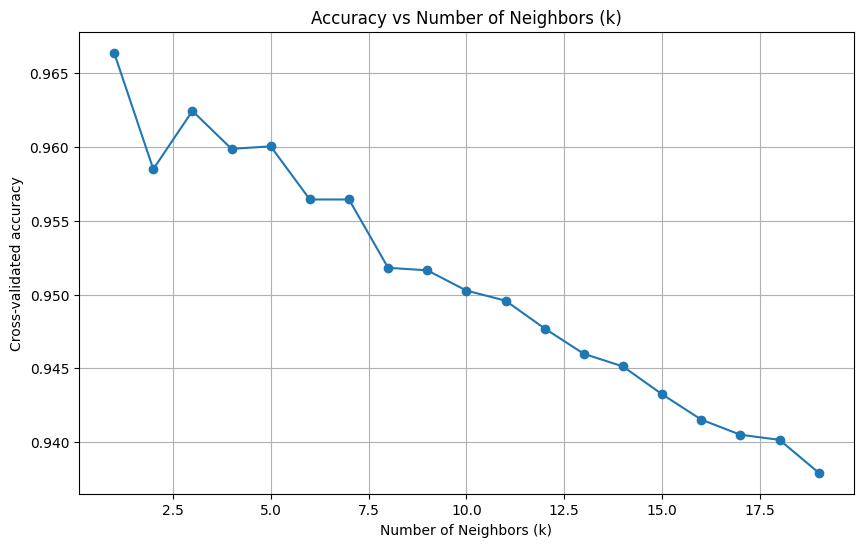

The optimal number of neighbors (k) is: 1


In [ ]:
#range of k values to try
k_values = range(1, 20)
#List to store average accuracy for each value of k
average_accuracies = []

#Loop to train model for each k value
for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  #cross-validation and take mean of the score
  scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
  average_accuracies.append(scores.mean())

#plot the relationship between k and the cross-validated accuracy
plt.figure(figsize=(10, 6))
plt.plot(k_values, average_accuracies, marker='o')
plt.title('Accuracy vs Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-validated accuracy')
plt.grid(True)
plt.show()

#find optimal k value as highest accuracy
optimal_k = k_values[average_accuracies.index(max(average_accuracies))]
print('The optimal number of neighbors (k) is:', optimal_k)

Refining KNN to maximum cross-validated accuracy

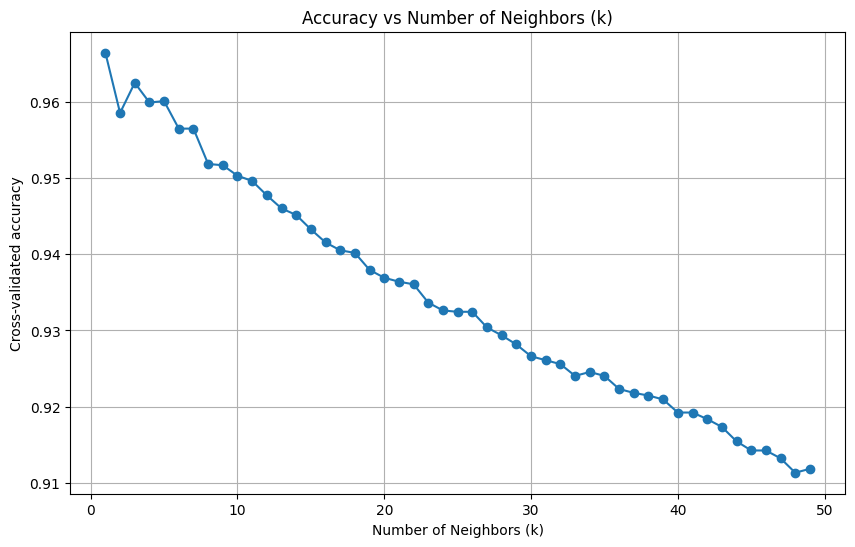

The optimal number of neighbors (k) is: 1


In [ ]:
#range of k values to try
k_values = range(1, 50)

#list to store average accuracy
average_accuracies = []

#loops to train model
for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
  average_accuracies.append(scores.mean())

# Plot the relationship between k and the cross-validated accuracy
plt.figure(figsize=(10, 6))
plt.plot(k_values, average_accuracies, marker='o')
plt.title('Accuracy vs Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-validated accuracy')
plt.grid(True)
plt.show()

# Find optimal k value as the one in the "sweet spot"
# This is just an example and you'll need to choose the best method to find your sweet spot.
optimal_k = max(zip(average_accuracies, k_values))[1]
print(f'The optimal number of neighbors (k) is: {optimal_k}')

# Train a new KNN model with the optimal k value
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)

# Now you can make predictions on the test set and evaluate
y_pred_optimal = knn_optimal.predict(X_test)

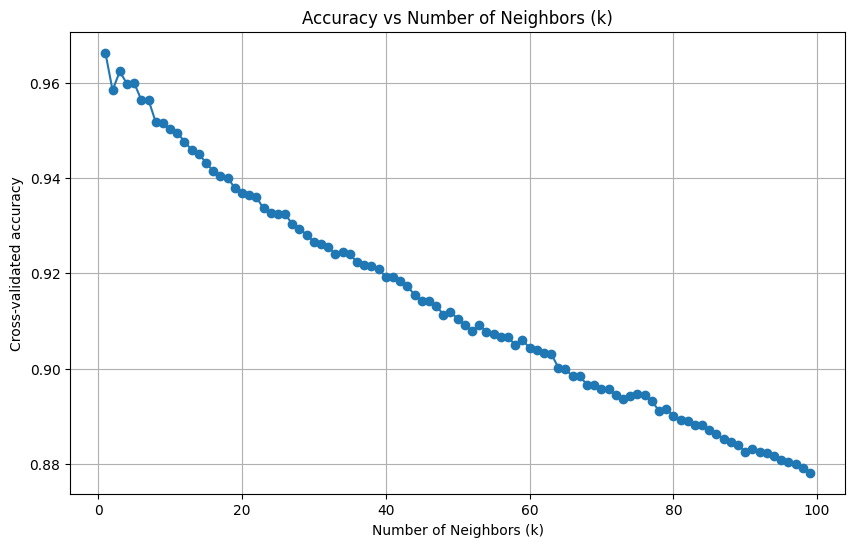

The optimal number of neighbors (k) is: 1


In [ ]:
#range of k values to try
k_values = range(1, 100)

#list to store average accuracy
average_accuracies = []

#loops to train model
for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
  average_accuracies.append(scores.mean())

# Plot the relationship between k and the cross-validated accuracy
plt.figure(figsize=(10, 6))
plt.plot(k_values, average_accuracies, marker='o')
plt.title('Accuracy vs Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-validated accuracy')
plt.grid(True)
plt.show()

# Find optimal k value as the one in the "sweet spot"
# This is just an example and you'll need to choose the best method to find your sweet spot.
optimal_k = max(zip(average_accuracies, k_values))[1]
print(f'The optimal number of neighbors (k) is: {optimal_k}')

# Train a new KNN model with the optimal k value
knn_optimal = KNeighborsClassifier(n_neighbors=5)
knn_optimal.fit(X_train, y_train)

# Now you can make predictions on the test set and evaluate
y_pred_optimal = knn_optimal.predict(X_test)

## Logistic Regressions

**Logistic Regression**

**OvR and OVO**

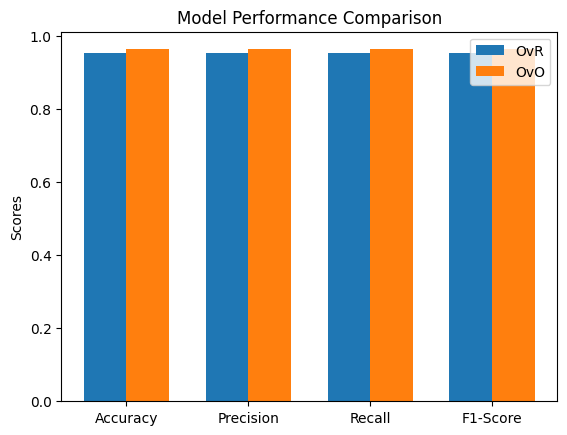

In [ ]:
# Model Training and Prediction
def train_and_predict(strategy, X_train, y_train, X_test):
    if strategy == 'ovr':
        model = LogisticRegression(max_iter=1000, multi_class='ovr')
    elif strategy == 'ovo':
        model = OneVsOneClassifier(LogisticRegression(max_iter=1000))
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return predictions

# Performance Evaluation
def evaluate_performance(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    report = classification_report(y_true, y_pred, output_dict=True)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']
    return accuracy, precision, recall, f1

# Plotting the Results
def plot_comparison(ovr_metrics, ovo_metrics):
    labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
    x = range(len(labels))
    width = 0.35

    fig, ax = plt.subplots()
    ax.bar(x, ovr_metrics, width, label='OvR')
    ax.bar([p + width for p in x], ovo_metrics, width, label='OvO')

    ax.set_ylabel('Scores')
    ax.set_title('Model Performance Comparison')
    ax.set_xticks([p + width / 2 for p in x])
    ax.set_xticklabels(labels)
    ax.legend()

    plt.show()

# Running the evaluations
y_pred_ovr = train_and_predict('ovr', X_train, y_train, X_test)
y_pred_ovo = train_and_predict('ovo', X_train, y_train, X_test)

ovr_metrics = evaluate_performance(y_test, y_pred_ovr)
ovo_metrics = evaluate_performance(y_test, y_pred_ovo)

# Plot the results
plot_comparison(ovr_metrics, ovo_metrics)

In [ ]:


# The first column is the target, and the rest are features
X = train_data.iloc[:, 1:].values  # features
y = train_data.iloc[:, 0].values  # target

# Split dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


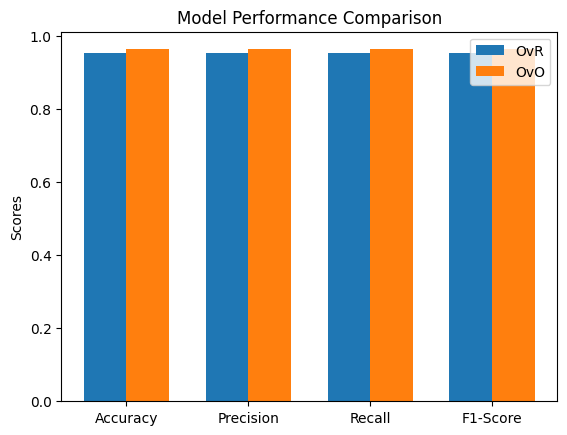

In [ ]:
# Model Training and Prediction
def train_and_predict(strategy, X_train, y_train, X_test):
    if strategy == 'ovr':
        model = LogisticRegression(max_iter=1000, multi_class='ovr')
    elif strategy == 'ovo':
        model = OneVsOneClassifier(LogisticRegression(max_iter=1000))
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return predictions

# Performance Evaluation
def evaluate_performance(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    report = classification_report(y_true, y_pred, output_dict=True)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']
    return accuracy, precision, recall, f1

# Plotting the Results
def plot_comparison(ovr_metrics, ovo_metrics):
    labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
    x = range(len(labels))
    width = 0.35

    fig, ax = plt.subplots()
    ax.bar(x, ovr_metrics, width, label='OvR')
    ax.bar([p + width for p in x], ovo_metrics, width, label='OvO')

    ax.set_ylabel('Scores')
    ax.set_title('Model Performance Comparison')
    ax.set_xticks([p + width / 2 for p in x])
    ax.set_xticklabels(labels)
    ax.legend()

    plt.show()

# Running the evaluations
y_pred_ovr = train_and_predict('ovr', X_train, y_train, X_test)
y_pred_ovo = train_and_predict('ovo', X_train, y_train, X_test)

ovr_metrics = evaluate_performance(y_test, y_pred_ovr)
ovo_metrics = evaluate_performance(y_test, y_pred_ovo)

# Plot the results
plot_comparison(ovr_metrics, ovo_metrics)

## Support Vector Machine

**SVM**

**OvR and OVO**

In [ ]:
X = train_data.drop(columns=[0]).values
y = train_data[0].values.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# One-vs-Rest
svm_ovr = SVC(decision_function_shape='ovr', kernel='linear') # You can change the kernel based on your data
svm_ovr.fit(X_train, y_train)

# One-vs-One
svm_ovo = SVC(decision_function_shape='ovo', kernel='linear') # You can change the kernel based on your data
svm_ovo.fit(X_train, y_train)


SVC(decision_function_shape='ovo', kernel='linear')

In [ ]:
# Predictions
y_pred_ovr = svm_ovr.predict(X_test)
y_pred_ovo = svm_ovo.predict(X_test)

# Accuracy
accuracy_ovr = accuracy_score(y_test, y_pred_ovr)
accuracy_ovo = accuracy_score(y_test, y_pred_ovo)

# Classification report
report_ovr = classification_report(y_test, y_pred_ovr, output_dict=True)
report_ovo = classification_report(y_test, y_pred_ovo, output_dict=True)

# Extract metrics
precision_ovr = report_ovr['weighted avg']['precision']
recall_ovr = report_ovr['weighted avg']['recall']
f1_score_ovr = report_ovr['weighted avg']['f1-score']

precision_ovo = report_ovo['weighted avg']['precision']
recall_ovo = report_ovo['weighted avg']['recall']
f1_score_ovo = report_ovo['weighted avg']['f1-score']


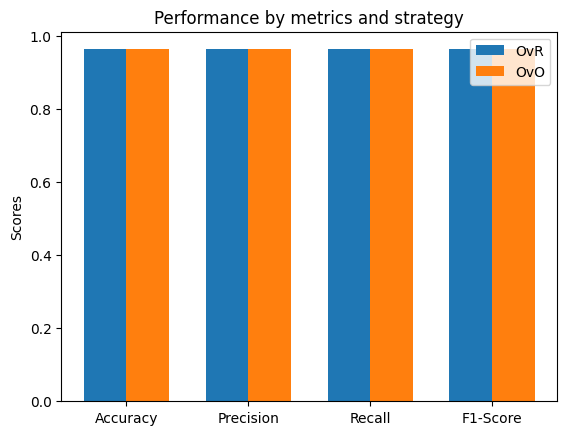

In [ ]:
# Performance data
performance_data = {
    'Accuracy': [accuracy_ovr, accuracy_ovo],
    'Precision': [precision_ovr, precision_ovo],
    'Recall': [recall_ovr, recall_ovo],
    'F1-Score': [f1_score_ovr, f1_score_ovo]
}

# Plot
metrics = list(performance_data.keys())
performance_ovr = [metrics[0] for metrics in performance_data.values()]
performance_ovo = [metrics[1] for metrics in performance_data.values()]

x = range(len(metrics))

fig, ax = plt.subplots()
rects1 = ax.bar(x, performance_ovr, width=0.35, label='OvR')
rects2 = ax.bar([p + 0.35 for p in x], performance_ovo, width=0.35, label='OvO')

ax.set_ylabel('Scores')
ax.set_title('Performance by metrics and strategy')
ax.set_xticks([p + 0.35 / 2 for p in x])
ax.set_xticklabels(metrics)
ax.legend()

plt.show()

In [ ]:

#'ovo' for one-vs-one approach
svm = SVC(decision_function_shape='ovo')
svm.fit(X_train, y_train)
svm_predictions = svm.predict(X_test)
print('SVM Accuracy:', accuracy_score(y_test, svm_predictions))
print(classification_report(y_test, svm_predictions))

SVM Accuracy: 0.9773817683344757
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       247
           1       1.00      0.99      0.99       214
           2       0.98      0.98      0.98       131
           3       0.95      0.95      0.95       115
           4       0.95      1.00      0.98       126
           5       0.96      0.96      0.96       114
           6       0.99      0.99      0.99       123
           7       0.98      0.97      0.98       151
           8       0.96      0.95      0.96       108
           9       0.98      0.97      0.97       130

    accuracy                           0.98      1459
   macro avg       0.97      0.98      0.97      1459
weighted avg       0.98      0.98      0.98      1459



## Random Forest

In [ ]:
# Try different depths
rf = RandomForestClassifier(max_depth=10, random_state=42)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
print('Random Forrest Accuracy:', accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

Random Forrest Accuracy: 0.9609321453050035
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       247
           1       1.00      1.00      1.00       214
           2       0.95      0.95      0.95       131
           3       0.94      0.93      0.93       115
           4       0.94      0.98      0.96       126
           5       0.95      0.93      0.94       114
           6       0.98      0.98      0.98       123
           7       0.98      0.93      0.96       151
           8       0.94      0.91      0.92       108
           9       0.91      0.96      0.93       130

    accuracy                           0.96      1459
   macro avg       0.96      0.96      0.96      1459
weighted avg       0.96      0.96      0.96      1459



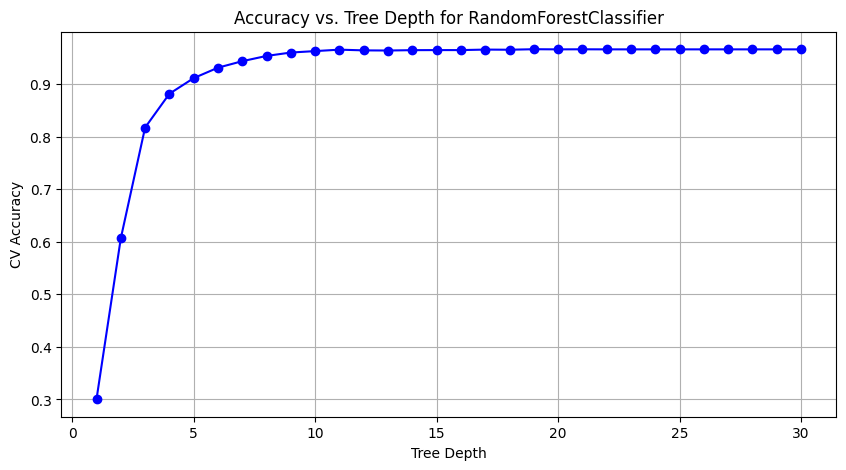

In [ ]:
# Range of depths to evaluate
max_depths = range(1, 31)
cv_scores = []

# Loop to evaluate each depth
for depth in max_depths:
    model = RandomForestClassifier(max_depth=depth, random_state=42)
    # Perform 5-fold cross-validation and store mean accuracy score
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Plotting accuracy vs tree depth
plt.figure(figsize=(10, 5))
plt.plot(max_depths, cv_scores, marker='o', linestyle='-', color='blue')
plt.title('Accuracy vs. Tree Depth for RandomForestClassifier')
plt.xlabel('Tree Depth')
plt.ylabel('CV Accuracy')
plt.grid()
plt.show()

Hyperparameter tuning for Random Forest using GridSearchCV / RandomizedSearchCV

# **Part 4: Results**

In [ ]:
#add test file
gz_file_path = '/content/zip.test.gz'
extracted_file_path = '/content/zip.test'

with gzip.open(gz_file_path, 'rb') as f_in:
  with open(extracted_file_path, 'wb') as f_out:
    f_out.write(f_in.read())

print('Extraction completed.')

test_data = pd.read_csv(extracted_file_path, sep='\s+', header=None)
test_data.head()

Extraction completed.


,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,9,-1.0,-1.0,-1.0,-1.000,-1.0,-0.948,-0.561,0.148,0.384,...,-1.000,-0.908,0.430,0.622,-0.973,-1.000,-1.0,-1.0,-1.0,-1.0
1,6,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0
2,3,-1.0,-1.0,-1.0,-0.593,0.7,1.000,1.000,1.000,1.000,...,1.000,0.717,0.333,0.162,-0.393,-1.000,-1.0,-1.0,-1.0,-1.0
3,6,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0
4,6,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-0.858,-0.106,...,0.901,0.901,0.901,0.290,-0.369,-0.867,-1.0,-1.0,-1.0,-1.0


In [ ]:
test_data.shape

(2007, 257)

Prepare test data

In [ ]:
y_test = test_data.iloc[:, 0]
X_test = test_data.drop(columns=[0])

In [ ]:

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Now you can make predictions on the test set
y_pred = knn.predict(X_test)

## Evaluate the Model KNN

KNN Accuracy: 0.9458533241946538
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       247
           1       1.00      1.00      1.00       214
           2       0.92      0.93      0.92       131
           3       0.90      0.90      0.90       115
           4       0.90      0.93      0.91       126
           5       0.91      0.89      0.90       114
           6       0.98      0.98      0.98       123
           7       0.97      0.96      0.96       151
           8       0.88      0.87      0.87       108
           9       0.95      0.95      0.95       130

    accuracy                           0.95      1459
   macro avg       0.94      0.94      0.94      1459
weighted avg       0.95      0.95      0.95      1459



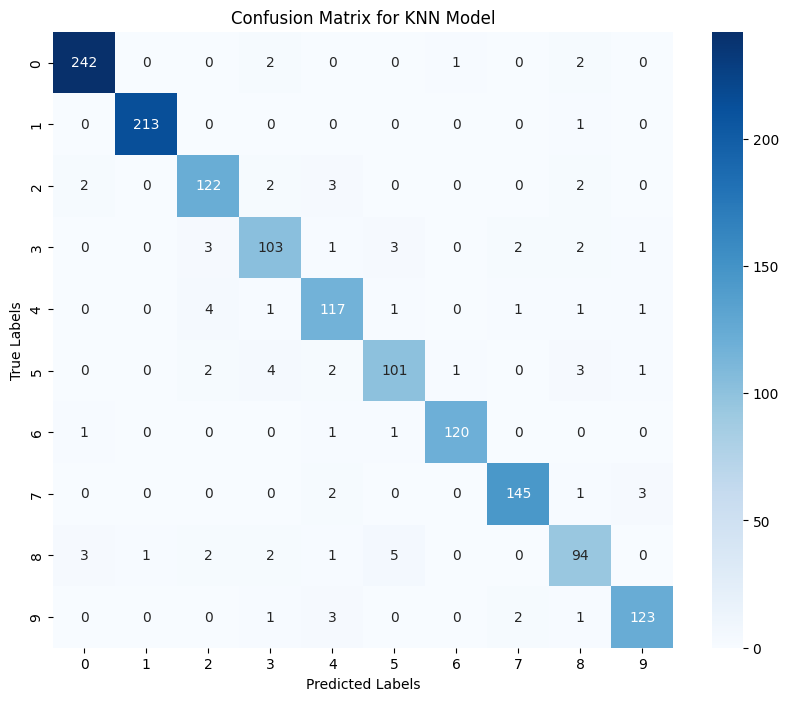

In [ ]:
# Calculate accuracy on the test data
accuracy_knn = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f'KNN Accuracy: {accuracy_knn}')

# Generate a classification report
report_knn = classification_report(y_test, y_pred)
print(report_knn)

# Generate the confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for KNN Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Evaluate the Model - Random Forest

Random Forest Accuracy: 0.9609321453050035
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       247
           1       1.00      1.00      1.00       214
           2       0.95      0.95      0.95       131
           3       0.94      0.93      0.93       115
           4       0.94      0.98      0.96       126
           5       0.95      0.93      0.94       114
           6       0.98      0.98      0.98       123
           7       0.98      0.93      0.96       151
           8       0.94      0.91      0.92       108
           9       0.91      0.96      0.93       130

    accuracy                           0.96      1459
   macro avg       0.96      0.96      0.96      1459
weighted avg       0.96      0.96      0.96      1459



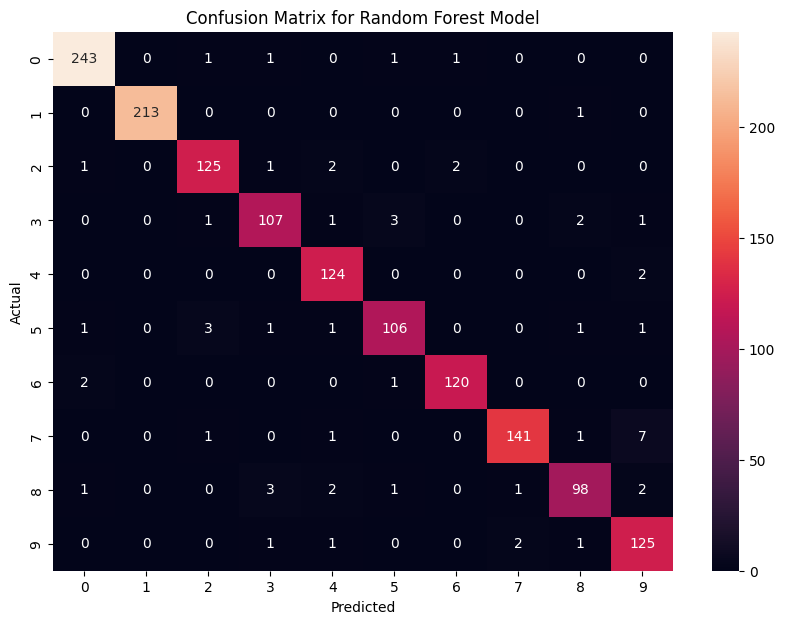

In [ ]:
#predit on test data
rf_predictions = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, rf_predictions)
print(f'Random Forest Accuracy: {accuracy}')

# Print classification report
print(classification_report(y_test, rf_predictions))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix for Random Forest Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## **Evaluate the Model - Support Vector Model**

SVM Accuracy: 0.9773817683344757
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       247
           1       1.00      0.99      0.99       214
           2       0.98      0.98      0.98       131
           3       0.95      0.95      0.95       115
           4       0.95      1.00      0.98       126
           5       0.96      0.96      0.96       114
           6       0.99      0.99      0.99       123
           7       0.98      0.97      0.98       151
           8       0.96      0.95      0.96       108
           9       0.98      0.97      0.97       130

    accuracy                           0.98      1459
   macro avg       0.97      0.98      0.97      1459
weighted avg       0.98      0.98      0.98      1459



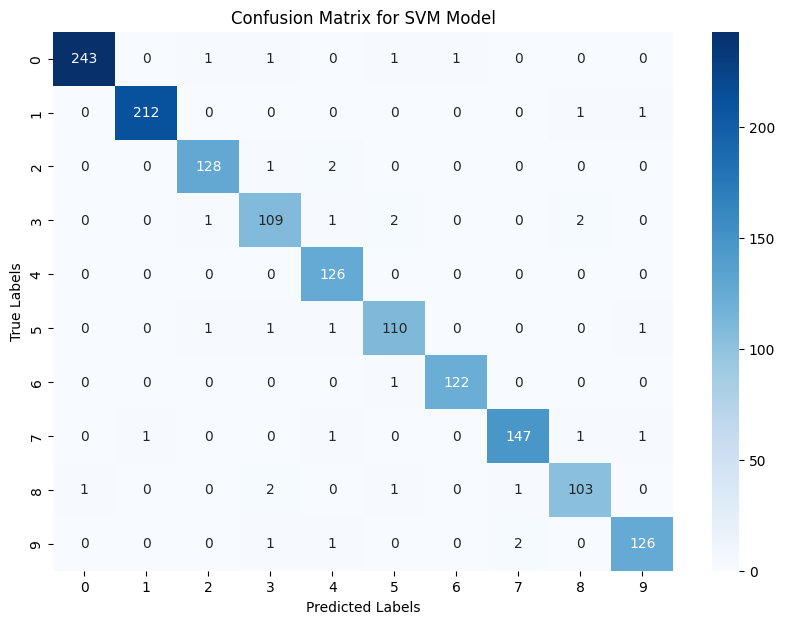

In [ ]:
#predict test data
svm_predictions = svm.predict(X_test)

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f'SVM Accuracy: {svm_accuracy}')

# Print classification report
print(classification_report(y_test, svm_predictions))

# Generate confusion matrix
conf_matrix_svm = confusion_matrix(y_test, svm_predictions)

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for SVM Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## **Logistic Regressions**

Logistic Regression Test Accuracy: 0.9458533241946538
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       247
           1       1.00      1.00      1.00       214
           2       0.92      0.93      0.92       131
           3       0.90      0.90      0.90       115
           4       0.90      0.93      0.91       126
           5       0.91      0.89      0.90       114
           6       0.98      0.98      0.98       123
           7       0.97      0.96      0.96       151
           8       0.88      0.87      0.87       108
           9       0.95      0.95      0.95       130

    accuracy                           0.95      1459
   macro avg       0.94      0.94      0.94      1459
weighted avg       0.95      0.95      0.95      1459



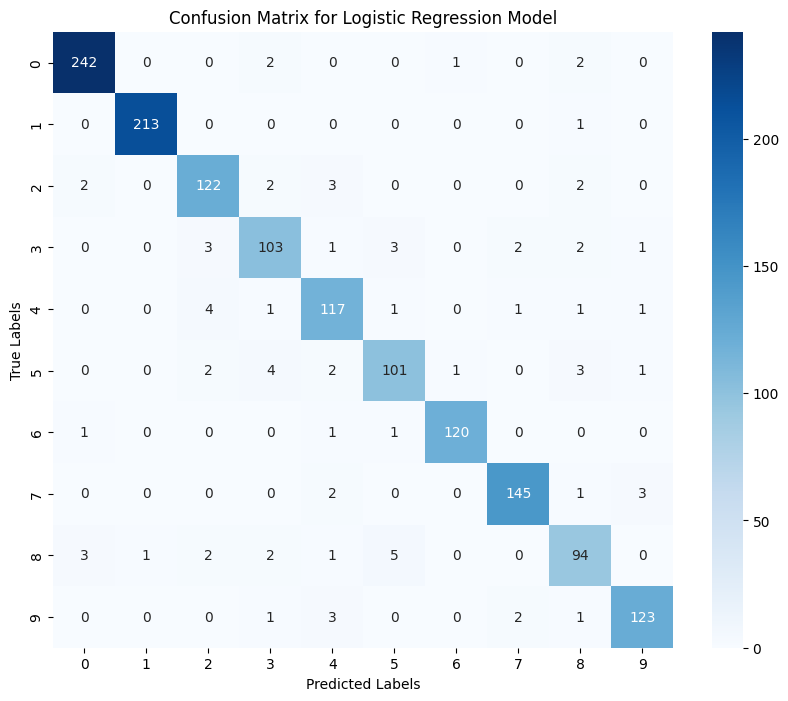

In [ ]:
# Initialize the Logistic Regression model with default parameters
log_reg = LogisticRegression(max_iter=2000)

# Fit the model on the training data
log_reg.fit(X_train, y_train)

# Predict the labels on the test set
y_pred = log_reg.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Test Accuracy: {accuracy}')

# Generate a classification report
report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()